In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
adata = (
    sq.datasets.four_i()
)  # sc.read("/Users/giovanni.palla/Datasets/tutorial_data/4i.h5ad")
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 270876 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
# sc.pp.subsample(adata, fraction=0.05)

In [4]:
adata.obs.cluster.value_counts()

Nucleolus            51802
Cell_periphery_1     37885
Cell_periphery_2     36226
ER_mitochondria_1    33660
ER_mitochondria_2    32378
Nucleus              28458
Cell_periphery_3     22788
Endosomes_golgi_1    22402
Nuclear_envelope      3674
Endosomes_golgi_2     1603
Name: cluster, dtype: int64

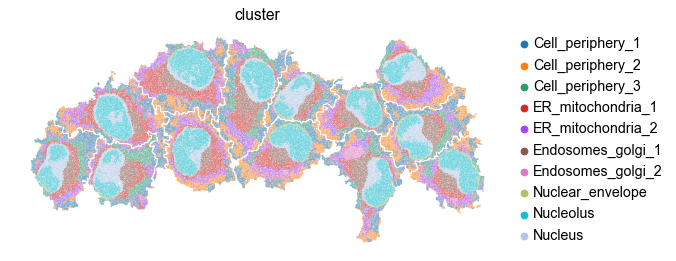

In [30]:
sc.pl.spatial(
    adata,
    spot_size=1,
    color="cluster",
    save="_4i.png",
    frameon=False
    #     show=False,
)

In [33]:
occ_list = []
interval_list = []
for c in adata.obs.cell_id.cat.categories:
    print(c)
    co_occ, interval = sq.gr.co_occurrence(
        adata[adata.obs.cell_id == c, :].copy(),
        cluster_key="cluster",
        n_splits=1,
        copy=True,
    )
    occ_list.append(co_occ)
    interval_list.append(interval)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


118


Finish (0:01:43)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


119


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


Finish (0:00:46)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


120


Finish (0:01:38)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


122


Finish (0:00:30)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


127


Finish (0:01:32)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


129


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


Finish (0:00:36)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


136


Finish (0:01:02)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


139


Finish (0:01:05)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


140


Finish (0:01:00)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


141


Finish (0:00:57)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


142


Finish (0:01:10)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


143


Finish (0:00:50)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Calculating co-occurrence probabilities for            `50` intervals            `1` split combinations            using `1` core(s)


146


Finish (0:00:42)


In [36]:
co_occ = sum([np.nan_to_num(i) for i in occ_list])
interval = sum([np.nan_to_num(i) for i in interval_list])

In [37]:
co_occ = co_occ / len(occ_list)
interval = interval / len(interval_list)

In [38]:
interval.shape

(50,)

In [39]:
adata.uns["cluster_co_occurrence"] = {}
adata.uns["cluster_co_occurrence"]["occ"] = co_occ
adata.uns["cluster_co_occurrence"]["interval"] = interval

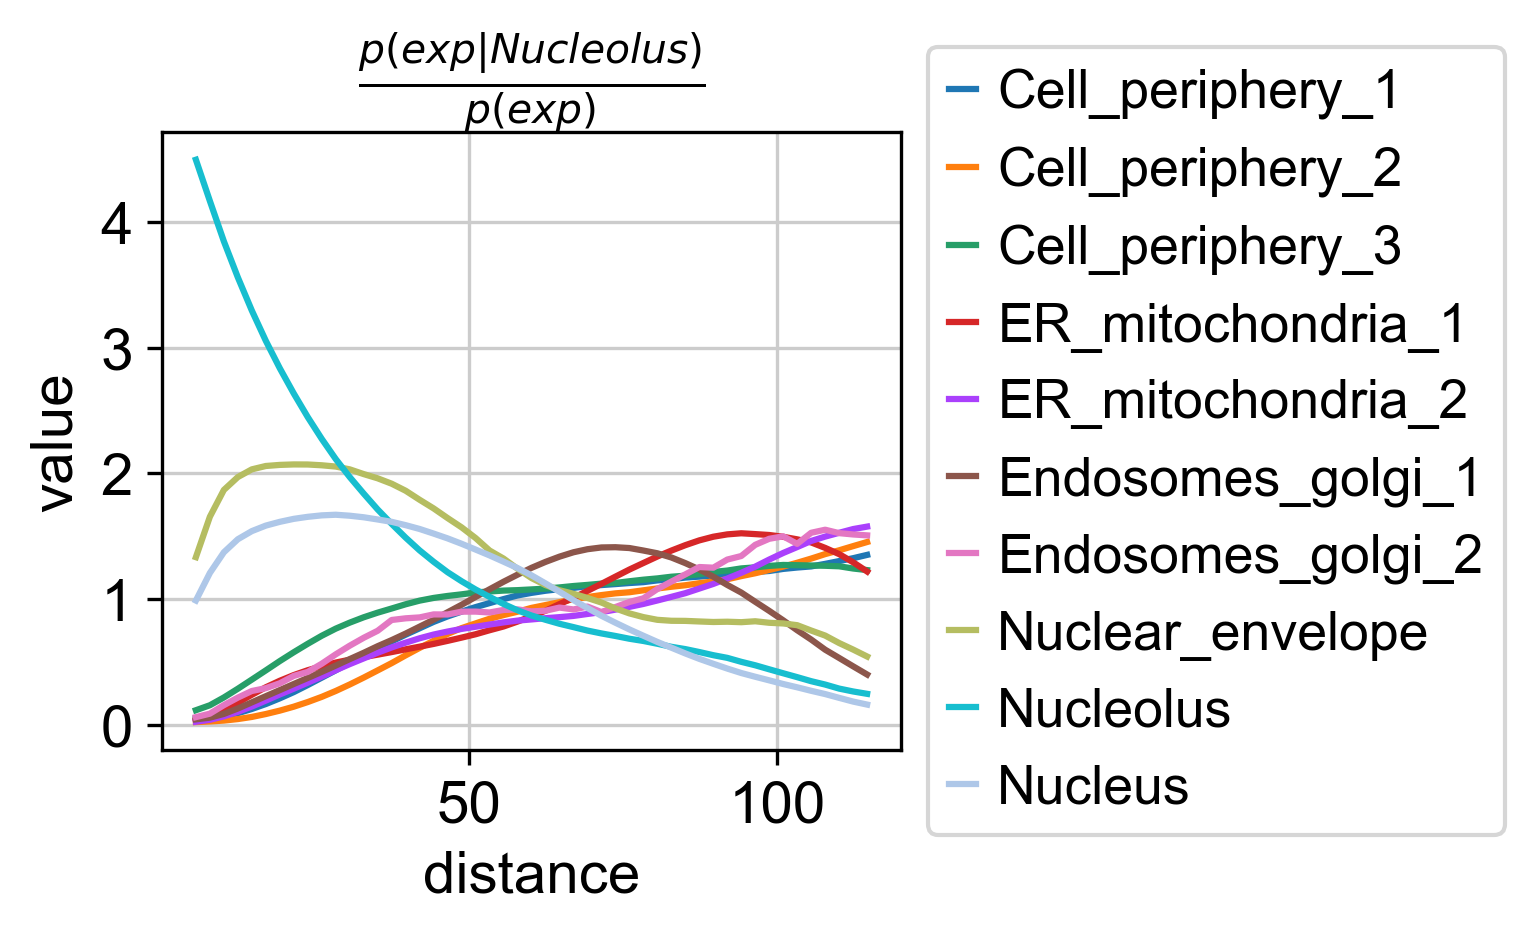

In [40]:
sq.pl.co_occurrence(
    adata,
    cluster_key="cluster",
    clusters="Nucleolus",
    dpi=300,
    figsize=(5, 3),
    legend=True,
    save="co_occurrence_4i",
)